# Regularization, Cross-Validation and Grid Search Assignment
---

We're going to work with the [advertising.csv](../Data/advertising.csv) dataset (from the Introduction to Statistical Learning with Python [book](https://www.statlearning.com/resources-python)), which contains sales data associated with advertisement costs across multiple channels like radio, tv, and newspapers.

The sales (target variable) is displayed in thousands of units, and the budget for tv, radio and newspaper is in thousands of dollars.

You're going to explore a few different regularized regression models, while performing all the necessary transformations and data preparations, before choosing a final model that you will use to predict new values.

In [198]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeCV, ElasticNet, ElasticNetCV, LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Q1: Read and Explore Data

1. Read the [advertising.csv](../Data/advertising.csv) file into a pandas DataFrame
2. Perform basic exploration; what's the average value for TV, radio and newspaper spend? Are there any missing values?
3. Create at least 1 visualization between the sales variable and one independent variable (pairplot, scatterplot, etc.,)

In [199]:
# Read data

df = pd.read_csv("../Data/advertising.csv")

In [200]:
# EDA

# First five rows of the dataset

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [201]:
# Checking for missing values and Column's Type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [202]:
# Basic statistics of the dataset

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [203]:
# Average values for TV, radio, and newspaper spend

avg_tv = df['TV'].mean()
avg_radio = df['radio'].mean()
avg_newspaper = df['newspaper'].mean()

print(f"Average TV spend is : {avg_tv}")
print(f"Average Radio spend is : {avg_radio}")
print(f"Average Newspaper spend is : {avg_newspaper}")

Average TV spend is : 147.0425
Average Radio spend is : 23.264000000000006
Average Newspaper spend is : 30.553999999999995


In [204]:
# Calculate the correlation matrix

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


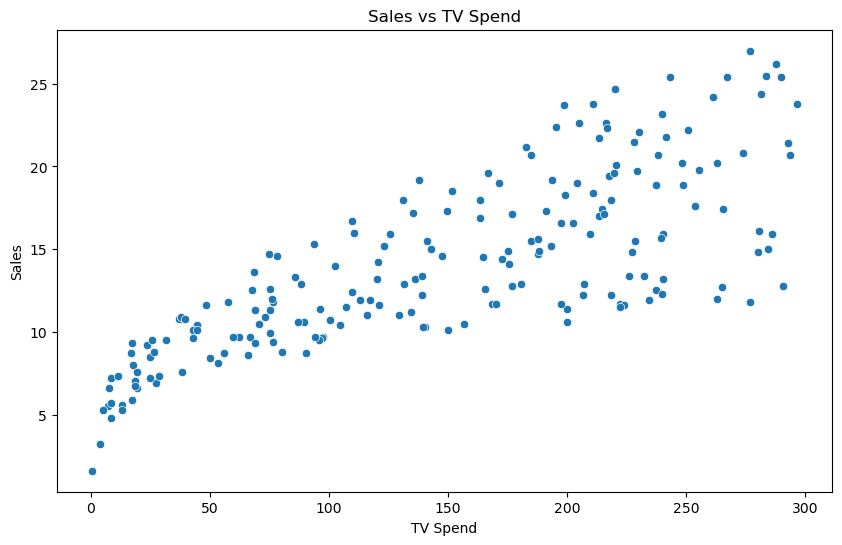

In [205]:
# Data Visualization

# scatter plot between sales and TV spend

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='sales')
plt.title('Sales vs TV Spend')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.show()

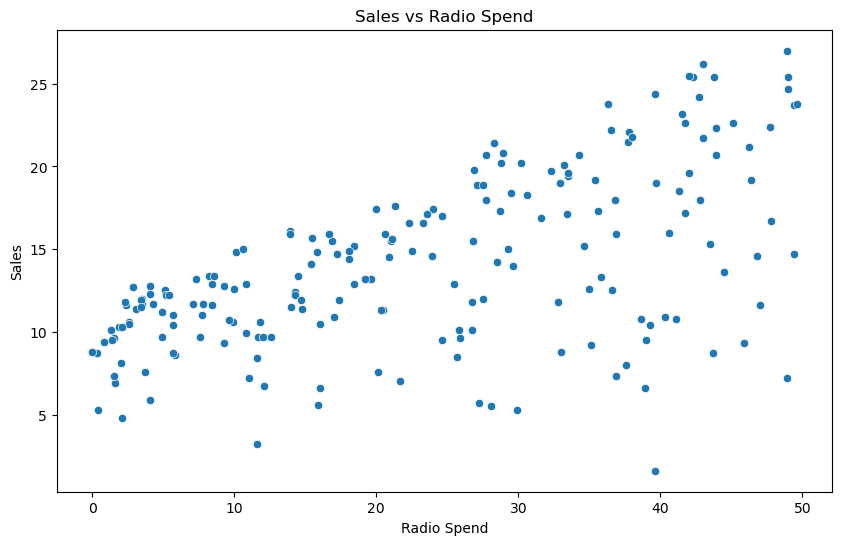

In [206]:
# scatter plot between sales and radio spend

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='radio', y='sales')
plt.title('Sales vs Radio Spend')
plt.xlabel('Radio Spend')
plt.ylabel('Sales')
plt.show()

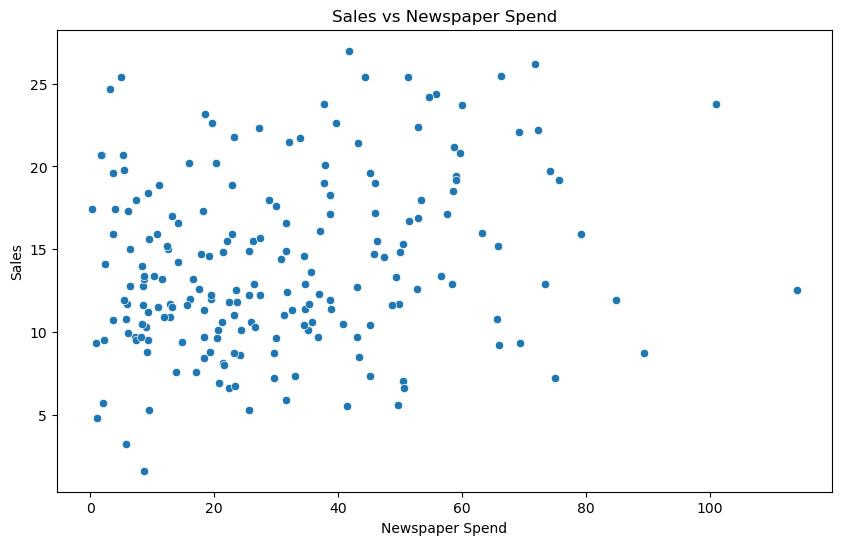

In [207]:
# scatter plot between sales and newspaper spend

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='newspaper', y='sales')
plt.title('Sales vs Newspaper Spend')
plt.xlabel('Newspaper Spend')
plt.ylabel('Sales')
plt.show()

## Q2: Prepare Data for Analysis

1. Seperate the X and y features
2. Create polynomial features (use the appropriate method to determine the right number of features)
3. Split your data into training and testing data
4. Choose the appropriate scaler for the independent variables

In [208]:
# Seperate X and y features
X = df.drop("sales",axis=1)
y = df["sales"]

In [209]:
# Creating polynomial features

# Placeholder for the best degree

best_degree = 1
best_score = float('inf')

for degree in range(1,11):
    poly_converter = PolynomialFeatures(degree)
    X_poly = poly_converter.fit_transform(X)
    
    # Splitting the data into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=1)
    
    # Standardizing the features
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Using RidgeCV to determine the best degree based on cross-validation
    
    ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
    ridge.fit(X_train_scaled, y_train)
    
    # Evaluate the model on the test set
    
    predictions = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    
    if mse < best_score:
        best_score = mse
        best_degree = degree

print(f"Best degree for polynomial features: {best_degree}, with mean squared error : {best_score}")

Best degree for polynomial features: 4, with mean squared error : 0.17530708136946496


In [210]:
# Creat polyfeatures

poly = PolynomialFeatures(best_degree,include_bias=False)
X_poly = poly.fit_transform(X)

In [211]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=1)

In [212]:
# Scale data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Q3: RidgeCV

1. Build a RidgeCV model.
    - Use the [RidgeCV documentation](https://scikit-) guide to help you choose the range for alpha
    - Select the scoring metric of your choice
2. Obtain the MAE, MSE and RMSE for your RidgeCV model
3. What is the optimal alpha value chosen by RidgeCV?
4. Obtain the model coefficients

In [213]:
# RidgeCV model

ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0,100), scoring='neg_mean_squared_error', cv=5)

# Fit the RidgeCV model

ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0, 100), cv=5, scoring='neg_mean_squared_error')

In [214]:
# Evaluation metrics

# Predict on the test set

ridge_cv_predictions = ridge_cv.predict(X_test_scaled)

# Calculate metrics

ridge_cv_mae = mean_absolute_error(y_test, ridge_cv_predictions)
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_predictions)
ridge_cv_rmse = np.sqrt(ridge_cv_mse)

print(f"RidgeCV - MAE: {ridge_cv_mae}")
print(f"RidgeCV - MSE: {ridge_cv_mse}")
print(f"RidgeCV - RMSE: {ridge_cv_rmse}")

RidgeCV - MAE: 0.30433754319246503
RidgeCV - MSE: 0.1851834173043778
RidgeCV - RMSE: 0.4303294288151553


In [215]:
# Optimal alpha value

print(f"RidgeCV - Optimal Alpha: {ridge_cv.alpha_}")

RidgeCV - Optimal Alpha: 0.1


In [216]:
# model coefficients

ridge_cv.coef_

array([ 5.82668979,  0.6362398 ,  0.44690834, -5.20743725,  4.14925635,
       -0.41500865, -0.30672148, -0.21500536, -0.59644562, -0.17109335,
       -1.65580592, -0.7276512 ,  1.43291522, -0.16851493,  0.75843496,
       -0.59707455,  0.42456284, -0.25074754,  0.86513587,  1.3479134 ,
        1.5279986 ,  0.87877381, -1.96705289,  0.3941261 , -0.47065764,
        0.86141522, -0.49782978, -0.11134061, -0.05605406,  0.19411655,
       -0.06401772,  0.19709812,  0.25466638, -0.62270967])

## Q4: ElasticNet Grid Search

1. Using GridSearchCV:
    - create a grid dictionary parameter grid of values for ElasticNet
    - Remember to create a base model first
    - Select the scoring metric of your choice
2. What are the optimal values for alpha and for l1_ratio?
3. Obtain the MAE, MSE and RMSE for your ElasticNet grid model

In [217]:
# GridSearchCV model

# Create base model

elasticnet_base = ElasticNet()

# Define the parameter grid

param_grid = {
                'alpha': [0.1,1,5,10,50,100],
                'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]
              }

# Initialize GridSearchCV

grid_search = GridSearchCV(estimator=elasticnet_base,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

# Fit GridSearchCV

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [218]:
# Optimal alpha and l1_ratio values (Method 1)

grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [219]:
# Optimal alpha and l1_ratio values (Method 2)

print(f"GridSearchCV - Best Alpha: {grid_search.best_params_['alpha']}")
print(f"GridSearchCV - Best L1 Ratio: {grid_search.best_params_['l1_ratio']}")

GridSearchCV - Best Alpha: 0.1
GridSearchCV - Best L1 Ratio: 0.99


In [220]:
# GridSearchCV metrics

# Predict on the test set

grid_predictions = grid_search.predict(X_test_scaled)

# Calculate metrics

grid_mae = mean_absolute_error(y_test, grid_predictions)
grid_mse = mean_squared_error(y_test, grid_predictions)
grid_rmse = np.sqrt(grid_mse)


print(f"GridSearchCV - MAE: {grid_mae}")
print(f"GridSearchCV - MSE: {grid_mse}")
print(f"GridSearchCV - RMSE: {grid_rmse}")

GridSearchCV - MAE: 0.34125493068078094
GridSearchCV - MSE: 0.1960535258235465
GridSearchCV - RMSE: 0.44277931955269373


## Q5: ElasticNetCV

1. Build a model using ElasticNetCV 
2. Compare the l1_ratio obtained from this model with the ratio obtained from the grid search model
3. Print the MAE, MSE and RMSE for your ElasticNetCV model. Does it perform better?

In [221]:
# ElasticCV model

elasticnet_cv = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                             n_alphas=200, 
                             cv=5,
                             eps=0.001,
                             max_iter=10000)

# Fit ElasticNetCV

elasticnet_cv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=10000, n_alphas=200)

In [222]:
# l1 ratio comparison

best_l1_ratio_cv = elasticnet_cv.l1_ratio_

print(f"ElasticNetCV - Best l1_ratio: {best_l1_ratio_cv}")
print(f"GridSearchCV - Best l1_ratio: {grid_search.best_params_['l1_ratio']}")

ElasticNetCV - Best l1_ratio: 1.0
GridSearchCV - Best l1_ratio: 0.99


In [223]:
# ElasticNetCV metrics

# Predict on the test set

elasticnet_cv_predictions = elasticnet_cv.predict(X_test_scaled)

# Calculate metrics

elasticnet_cv_mae = mean_absolute_error(y_test, elasticnet_cv_predictions)
elasticnet_cv_mse = mean_squared_error(y_test, elasticnet_cv_predictions)
elasticnet_cv_rmse = np.sqrt(elasticnet_cv_mse)


print(f"ElasticNetCV - MAE: {elasticnet_cv_mae}")
print(f"ElasticNetCV - MSE: {elasticnet_cv_mse}")
print(f"ElasticNetCV - RMSE: {elasticnet_cv_rmse}")

ElasticNetCV - MAE: 0.323729350734666
ElasticNetCV - MSE: 0.18072104515833926
ElasticNetCV - RMSE: 0.4251129792870823


In [224]:
# coefficients

elasticnet_cv.coef_

array([ 5.74452701,  0.29096937,  0.16351245, -5.47529354,  4.22075469,
       -0.1086108 ,  0.        ,  0.00868269,  0.        ,  0.        ,
       -0.32014137, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.02670939,  0.        ,  1.51852826,
       -0.        ,  0.        , -0.007676  , -0.14701649, -0.        ,
        0.00813372, -0.        , -0.        , -0.        ,  0.06654124,
        0.        ,  0.03730514,  0.00760564,  0.        ])

## Q6: LassoCV

Finally, fit the data to a LassoCV model. 
1. Read the [LassoCV documentation guide](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) to help you select the right values for eps, n_alphas, and cv
2. What is the alpha value chosen by LassoCV?
3. Print the coefficients for this model. What does it tell you about the features used by LassoCV?
4. Print the MAE, MSE and RMSE for your ElasticNetCV model. Does it perform better?

In [225]:
# LassoCV model

lasso_cv = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=10000)

# Fit LassoCV model

lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5, max_iter=10000)

In [226]:
# Optimal alpha value

print(f"LassoCV - Best Alpha: {lasso_cv.alpha_}")

LassoCV - Best Alpha: 0.005175869360552048


In [227]:
# lassocv coefficients
lassocv_model.coef_

array([ 4.46844748,  0.29917375,  0.14409943, -2.81760318,  3.84888579,
       -0.21100238,  0.07684343,  0.06070242,  0.04897518])

In [228]:
# lassocv metrics

# Predict on the test set

lasso_cv_predictions = lasso_cv.predict(X_test_scaled)

# Calculate metrics

lasso_cv_mae = mean_absolute_error(y_test, lasso_cv_predictions)
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_predictions)
lasso_cv_rmse = np.sqrt(lasso_cv_mse)

# Print results
print(f"\nLassoCV - MAE: {lasso_cv_mae}")
print(f"LassoCV - MSE: {lasso_cv_mse}")
print(f"LassoCV - RMSE: {lasso_cv_rmse}")


LassoCV - MAE: 0.323729350734666
LassoCV - MSE: 0.18072104515833926
LassoCV - RMSE: 0.4251129792870823


## Q7: New Predictions

From the above models, select the model that performs best in your opinion. 

1. Why did you choose that model?
2. Use that model to predict the sales units for:

    - TV spend of 128.3
    - Radio spend of 32.5
    - newspaper spend of 27.9

**1. Why did you choose that model?**

RidgeCV has the lowest MAE : 0.3043 among all models.

ElasticNetCV has the lowest MSE : 0.1807 and RMSE :0.4251, closely followed by RidgeCV.

Given that MAE is a direct measure of average prediction error, and RidgeCV has the lowest MAE, I would choose RidgeCV as the best-performing model for this dataset.

**2. Use that model to predict the sales units for: TV spend of 128.3, Radio spend of 32.5,newspaper spend of 27.9**

In [229]:
# Prepare input data for prediction

TV_spend = 128.3
Radio_spend = 32.5
Newspaper_spend = 27.9

# Create polynomial features

poly = PolynomialFeatures(degree=4, include_bias=False)
X_new_poly = poly.fit_transform([[TV_spend, Radio_spend, Newspaper_spend]])

# Scale the input data

X_new_poly_scaled = scaler.transform(X_new_poly)

# Predict using the RidgeCV model

predicted_sales_units = ridge_cv.predict(X_new_poly_scaled)

print(f"Predicted sales units is : {predicted_sales_units[0]}")

Predicted sales units is : 15.657580464982962


# Great Job!